## Importing Datasets

1. The first dataset comes from Kaggle. https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset 

2. The second dataset comes from Harvard Database. https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/EWHO0O 

In [ ]:
%pip install numpy pandas matplotlib seaborn openpyxl

   ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.4 MB 6.0 MB/s eta 0:00:02
   -------- ------------------------------- 2.6/12.4 MB 6.3 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.4 MB 5.8 MB/s eta 0:00:02
   ---------------- ----------------------- 5.0/12.4 MB 5.9 MB/s eta 0:00:02
   -------------------- ------------------- 6.3/12.4 MB 6.0 MB/s eta 0:00:02
   ------------------------- -------------- 7.9/12.4 MB 6.2 MB/s eta 0:00:01
   -------------------------------- ------- 10.0/12.4 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 12.4/12.4 MB 7.6 MB/s  0:00:01
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.9 MB 12.7 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.9 MB 10.1 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.9 MB 10.5 MB/s eta 0:00:01
   ------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\Zi Hao\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\site-packages\\fontTools\\ttLib\\tables\\S_V_G_.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-3.0.0-cp314-cp314-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
Using cached pandas-3.0.0-cp314-cp314-win_amd64.whl (9.9 MB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl (75 kB)

   ----- ---------------------------------- 1/7 [fonttools]
   ----- ---------------------------------- 1/7 [fonttools]
   ----- ---------------------------------- 1/7 [fonttools]
   -----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl

In [221]:
df_1 = pd.read_csv('data/Mental Health Dataset.csv')

df_1.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


Let's explore the Mental Health Dataset first.

In [222]:
for col in df_1.columns:
    print(f"Column: {col}")
    print(df_1[col].value_counts(dropna=False))  # include NaNs
    print("-" * 30)

# To narrow the scope, let's just focus on Students

students = df_1[df_1['Occupation'] == 'Student']

students = students.drop(columns=['Timestamp', 'self_employed', 'Country'], inplace=False)

# yes_no_cols = ["family_history", "treatment", "Growing_Stress", "Changes_Habits", "Mental_Health_History", "Coping_Struggles", "Work_Interest", "Social_Weakness"]
# df_1[yes_no_cols] = df_1[yes_no_cols].apply(lambda col: col.map({"Yes": 1, "No": 0}))


Column: Timestamp
Timestamp
8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 12:39    1604
8/27/2014 16:21    1604
                   ... 
7/27/2015 23:25     390
8/17/2015 9:38      390
8/25/2015 19:59     390
9/26/2015 1:07      390
2/1/2016 23:04      390
Name: count, Length: 580, dtype: int64
------------------------------
Column: Gender
Gender
Male      239850
Female     52514
Name: count, dtype: int64
------------------------------
Column: Country
Country
United States             171308
United Kingdom             51404
Canada                     18726
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
South Africa                1994
New Zealand                 1994
Switzerland                 1560
Israel                      1560
Italy 

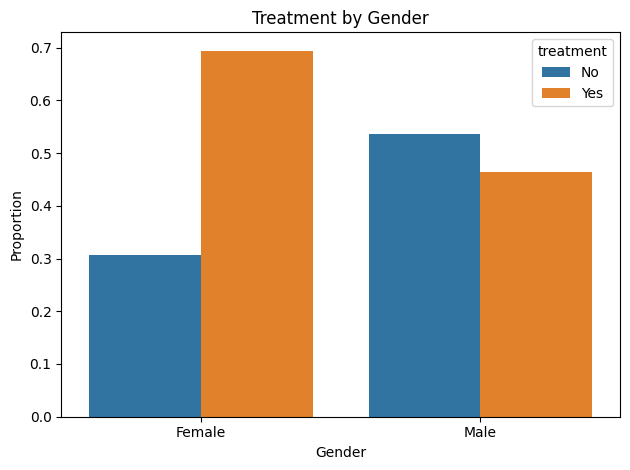

In [156]:
# Proportion of each Treatment category by Gender
mh_students = students[students["Mental_Health_History"].isin(["Yes", "Maybe"])]
grouped = mh_students.groupby(["Gender", "treatment"]).size().reset_index(name="count")
grouped["proportion"] = grouped.groupby("Gender")["count"].transform(lambda x: x / x.sum())

sns.barplot(data=grouped, x="Gender", y="proportion", hue="treatment")
plt.ylabel("Proportion")
plt.title("Treatment by Gender")
plt.tight_layout()
plt.show()

In [223]:
students["MH_Flag"] = students["Mental_Health_History"].isin(["Yes", "Maybe"])

In [226]:
students["Mental_Health_History"].value_counts()

Mental_Health_History
No       23058
Maybe    20709
Yes      18027
Name: count, dtype: int64

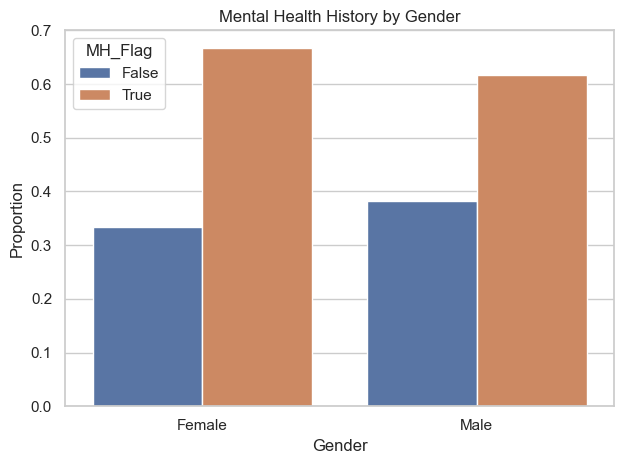

In [225]:
grouped = students.groupby(["Gender", "MH_Flag"]).size().reset_index(name="count")
grouped["proportion"] = grouped.groupby("Gender")["count"].transform(lambda x: x / x.sum())

sns.barplot(data=grouped, x="Gender", y="proportion", hue="MH_Flag")
plt.ylabel("Proportion")
plt.title("Mental Health History by Gender")
plt.tight_layout()
plt.show()

### 2. Microplot: How do number of days indoors influence Mental Health History between Genders


Let's split days indoor to 2 groups: Less than or equal 30 days and more than 30 days.

In [227]:

# Function to reclassify
def reclassify_days(x):
    if x in ["Go out Every day", "1-14 days", "15-30 days"]:
        return "<=30 days"
    elif x in ["31-60 days", "More than 2 months"]:
        return ">30 days"
    else:
        return "Unknown"

# Apply function
students['Days_Indoor_Reclass'] = students['Days_Indoors'].apply(reclassify_days)
students.drop(columns=['Days_Indoors'], inplace=True)

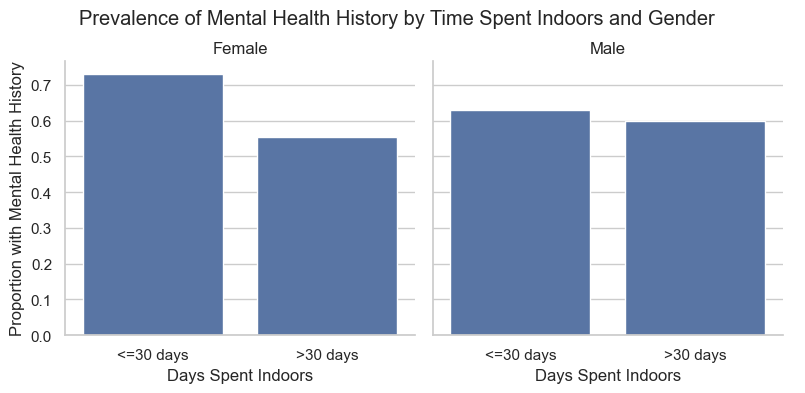

In [228]:
grouped = (
    students
    .groupby(["Gender", "Days_Indoor_Reclass"])
    ["MH_Flag"]
    .mean()
    .reset_index(name="proportion_mh")
)

g = sns.catplot(
    data=grouped,
    x="Days_Indoor_Reclass",
    y="proportion_mh",
    col="Gender",
    kind="bar",
    height=4,
    aspect=1
)

g.set_axis_labels("Days Spent Indoors", "Proportion with Mental Health History")
g.set_titles("{col_name}")

plt.subplots_adjust(top=0.85)
g.fig.suptitle(
    "Prevalence of Mental Health History by Time Spent Indoors and Gender"
)

plt.show()

In [240]:
df_2 = pd.read_excel('data/ALL_aun_pacs210914.xlsx')

In [233]:
df_2.columns.to_list()

['pin',
 'lang',
 'gpaq1',
 'gpaq2',
 'P1',
 'P2',
 'P3a',
 'P3bb',
 'P3b',
 'P4',
 'P5',
 'P6a',
 'P6bb',
 'P6b',
 'P7',
 'P8',
 'P9a',
 'P9bb',
 'P9b',
 'P10',
 'P11',
 'P12a',
 'P12bb',
 'P12b',
 'P13',
 'P14',
 'P15a',
 'P15bb',
 'P15b',
 'run_jog',
 'cycle',
 'aerodance',
 'ballgame',
 'racquet',
 'athletics',
 'watersport',
 'fightsport',
 'sport_total',
 'sport_cat',
 'run_jog_wkdy',
 'cycle_wkdy',
 'aerodance_wkdy',
 'ballgame_wkdy',
 'racquet_wkdy',
 'athletics_wkdy',
 'watersport_wkdy',
 'fightsport_wkdy',
 'run_jog_wkdy_t',
 'cycle_wkdy_t',
 'aerodance_wkdy_t',
 'ballgame_wkdy_t',
 'racquet_wkdy_t',
 'athletics_wkdy_t',
 'watersport_wkdy_t',
 'fightsport_wkdy_t',
 'run_jog_wkend',
 'cycle_wkend',
 'aerodance_wkend',
 'ballgame_wkend',
 'racquet_wkend',
 'athletics_wkend',
 'watersport_wkend',
 'fightsport_wkend',
 'run_jog_wkend_t',
 'cycle_wkend_t',
 'aerodance_wkend_t',
 'ballgame_wkend_t',
 'racquet_wkend_t',
 'athletics_wkend_t',
 'watersport_wkend_t',
 'fightsport_wkend

Let's clean the data and remove redundant columns.

In [287]:
keep_cols = ["lang", "gpaq1", "P11", "P14", "wemwbs1", "wemwbs2", "wemwbs3", "wemwbs4", "wemwbs5", "wemwbs6", "wemwbs7", "gender"]

df_2_keep = df_2[keep_cols]

df_2_keep = df_2_keep[df_2_keep['lang'] == "EN-Sing"]

Let's rename the new columns and make one column as an aggregate of mental health status.

In [288]:
mental_health_score_cols = ["wemwbs1", "wemwbs2", "wemwbs3", "wemwbs4", "wemwbs5", "wemwbs6", "wemwbs7"]

df_2_keep["Mental Health Score"] = df_2_keep[mental_health_score_cols].mean(axis=1)  

exercise_cols = ["gpaq1", "P11", "P14"]

df_2_keep["Number of days of exercise"] = df_2_keep[exercise_cols].mean(axis=1)

def reclassify_gender(x):
    if x == 1:
        return "Male"
    elif x == 2:
        return "Female"
    
df_2_keep['Gender'] = df_2_keep['gender'].apply(reclassify_gender)

df_2_keep.drop(columns=["gender", "lang", "gpaq1", "P11", "P14", "wemwbs1", "wemwbs2", "wemwbs3", "wemwbs4", "wemwbs5", "wemwbs6", "wemwbs7"], inplace=True)

In [289]:
df_2_keep.head()

,Mental Health Score,Number of days of exercise,Gender
1342,4.714286,0.333333,Female
1343,3.428571,0.000000,Male
1344,3.428571,0.333333,Male
1345,2.000000,0.666667,Female
1346,3.857143,1.333333,Male


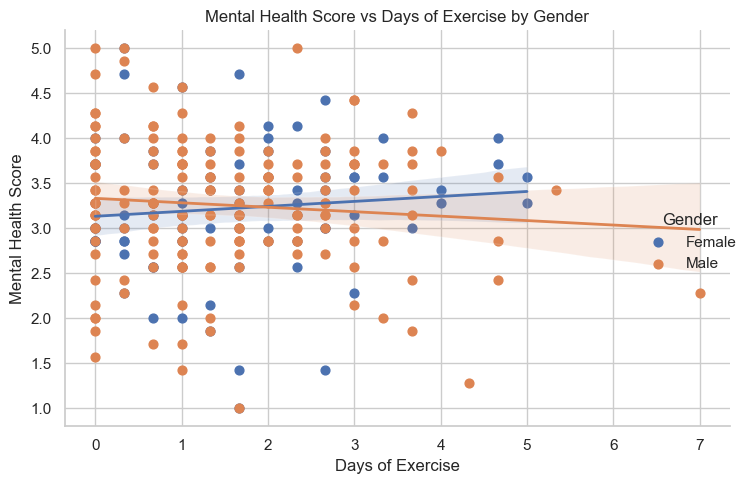

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(
    data=df_2_keep,
    x="Number of days of exercise",
    y="Mental Health Score",
    hue="Gender",
    ci=95,
    height=5,
    aspect=1.3,
    scatter_kws={"alpha": 1, "s": 40},
    line_kws={"linewidth": 2}
)

plt.title("Mental Health Score vs Days of Exercise by Gender")
plt.xlabel("Days of Exercise")
plt.ylabel("Mental Health Score")
plt.tight_layout()
plt.show()

